#**Data Science Engineering Methods and Tools**

## **Assignment 2** – Auto ML

**Name** - Mandar Deshmukh

**Nuid** - 002194579

# **Abstract**



Real estate is the basic need today, and the changes in the housing prices effects the investors and the common people. Hence, the prediction of the house prices has become an important concern.

The factors such as the Age of House, No of Rooms, Income, etc. has a huge impact on the housing prices. This notebook explains the correlation between these variables which may help in determining the most important features that may impact the housing prices in the United States. 

I have examined these concepts in the below notebook using H2O's AutoML library for building a regression model.
       
     


## **Installing H2O** 

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [4]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


## **Starting H2O server** 

In [5]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:6216 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphx3fhvqz
  JVM stdout: /tmp/tmphx3fhvqz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphx3fhvqz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:6216
Connecting to H2O server at http://127.0.0.1:6216 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_y7bjlq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## **Importing dataset** 

In [6]:
# Import the processed data from notebook One
url = "https://github.com/mandardeshmukh7/DataScience/raw/main/USA_Housing.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
#Omiting null values
df = df.na_omit()

In [8]:
#Dropping Address column
df = df.drop('Address',1)

In [9]:
df.head

Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
79545.5,5.68286,7.00919,4.09,23086.8,1.05903e+06
79248.6,6.0029,6.73082,3.09,40173.1,1.50589e+06
61287.1,5.86589,8.51273,5.13,36882.2,1.05899e+06
63345.2,7.18824,5.58673,3.26,34310.2,1.26062e+06
59982.2,5.04055,7.83939,4.23,26354.1,630943
80175.8,4.98841,6.10451,4.04,26748.4,1.06814e+06
64698.5,6.02534,8.14776,3.41,60828.2,1.50206e+06
78394.3,6.98978,6.62048,2.42,36516.4,1.57394e+06
59927.7,5.36213,6.39312,2.3,29387.4,798870
81885.9,4.42367,8.16769,6.1,40150,1.54515e+06


<bound method H2OFrame.head of >

In [10]:
df.types

{'Area Population': 'real',
 'Avg. Area House Age': 'real',
 'Avg. Area Income': 'real',
 'Avg. Area Number of Bedrooms': 'real',
 'Avg. Area Number of Rooms': 'real',
 'Price': 'real'}

In [11]:
df.describe()

Rows:5000
Cols:6




,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
type,real,real,real,real,real,real
mins,17796.631189543397,2.644304186036705,3.2361940234262048,2.0,172.61068627290044,15938.657923287848
mean,68583.10898395974,5.977222035280271,6.987791850907944,3.981329999999999,36163.51603857466,1232072.654142357
maxs,107701.74837763936,9.51908806613594,10.759588335938624,6.5,69621.7133777904,2469065.5941747027
sigma,10657.99121383037,0.9914561798281717,1.0058332312773866,1.2341372654846832,9925.650113501237,353117.6265810609
zeros,0,0,0,0,0,0
missing,0,0,0,0,0,0
0,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235
1,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695
2,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849


In [12]:
df.shape

(5000, 6)

## **Creating Train/Test split** 

In [13]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [14]:
print(df_train.shape)
print(df_test.shape)

(4010, 6)
(990, 6)


In [15]:
df_train.head()

Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
79545.5,5.68286,7.00919,4.09,23086.8,1.05903e+06
79248.6,6.0029,6.73082,3.09,40173.1,1.50589e+06
61287.1,5.86589,8.51273,5.13,36882.2,1.05899e+06
63345.2,7.18824,5.58673,3.26,34310.2,1.26062e+06
80175.8,4.98841,6.10451,4.04,26748.4,1.06814e+06
64698.5,6.02534,8.14776,3.41,60828.2,1.50206e+06
78394.3,6.98978,6.62048,2.42,36516.4,1.57394e+06
59927.7,5.36213,6.39312,2.3,29387.4,798870
81885.9,4.42367,8.16769,6.1,40150,1.54515e+06
80527.5,8.09351,5.04275,4.1,47224.4,1.70705e+06


## **Setting target and predictor variables** 

In [16]:
# Set the features and target
X=df.columns
print(X)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [17]:
# Set target and predictor variables
y ='Price'
X.remove(y) 
print(X)

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']


## **Setting up AutoML** 

In [18]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=3, exclude_algos = ["StackedEnsemble"])

In [19]:
#Train the aml
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20220214_44943_model_1


Status of Neuron Layers: predicting Price, regression, gaussian distribution, Quadratic loss, 141 weights/biases, 5.8 KB, 32,237 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,5,Input,0.0,,,,,,,,,
1,,2,20,RectifierDropout,0.0,0.0,0.0,0.001633,0.00074,0.0,0.009357,0.238283,0.56458,0.08559
2,,3,1,Linear,,0.0,0.0,0.0006,0.000135,0.0,-0.0129,0.332964,0.053037,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 11229439895.311914
RMSE: 105969.05159201867
MAE: 84795.10944377471
RMSLE: 0.11472228934762178
Mean Residual Deviance: 11229439895.311914

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 10792559792.900671
RMSE: 103887.24557375016
MAE: 83111.61501721319
RMSLE: 0.11163361100922635
Mean Residual Deviance: 10792559792.900671

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,8.557405e+04,2.181918e+03,8.173291e+04,8.687467e+04,8.595202e+04,8.641448e+04,8.689615e+04
1,mean_residual_deviance,1.138228e+10,5.528629e+08,1.080043e+10,1.143250e+10,1.126202e+10,1.113610e+10,1.228033e+10
2,mse,1.138228e+10,5.528629e+08,1.080043e+10,1.143250e+10,1.126202e+10,1.113610e+10,1.228033e+10
3,r2,9.099419e-01,3.280115e-03,9.072598e-01,9.151437e-01,9.098154e-01,9.104635e-01,9.070271e-01
4,residual_deviance,1.138228e+10,5.528629e+08,1.080043e+10,1.143250e+10,1.126202e+10,1.113610e+10,1.228033e+10
5,rmse,1.066630e+05,2.568905e+03,1.039251e+05,1.069229e+05,1.061227e+05,1.055277e+05,1.108167e+05
6,rmsle,1.165671e-01,2.018269e-02,9.923691e-02,1.207199e-01,1.054392e-01,1.075942e-01,1.498453e-01



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-02-14 04:53:21,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-02-14 04:53:21,14.570 sec,250384 obs/sec,0.811721,1,3255.0,122729.959015,1.506264e+10,97503.902984,0.880997
2,,2022-02-14 04:53:22,14.690 sec,253834 obs/sec,8.039152,10,32237.0,105969.051592,1.122944e+10,84795.109444,0.911281



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Avg. Area House Age,1.000000,1.000000,0.226196
1,Avg. Area Income,0.956396,0.956396,0.216333
2,Area Population,0.910981,0.910981,0.206060
3,Avg. Area Number of Rooms,0.874921,0.874921,0.197904
4,Avg. Area Number of Bedrooms,0.678642,0.678642,0.153506


## **AutoML Model Leaderboard** 

In [20]:
#printing the leaderboard
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid_1_AutoML_1_20220214_44943_model_1,1.07926e+10,103887,1.07926e+10,83111.6,0.111634
DeepLearning_1_AutoML_1_20220214_44943,1.14678e+10,107088,1.14678e+10,86085.1,0.118585
DeepLearning_grid_1_AutoML_1_20220214_44943_model_2,1.18911e+10,109046,1.18911e+10,87124.2,0.126407
GBM_grid_1_AutoML_1_20220214_44943_model_8,1.24424e+10,111545,1.24424e+10,89558.1,0.124223
XGBoost_grid_1_AutoML_1_20220214_44943_model_10,1.24604e+10,111626,1.24604e+10,88852.5,0.119548
XGBoost_grid_1_AutoML_1_20220214_44943_model_8,1.24643e+10,111643,1.24643e+10,89675.7,0.118488
GBM_2_AutoML_1_20220214_44943,1.24673e+10,111657,1.24673e+10,89745.4,0.124367
GBM_5_AutoML_1_20220214_44943,1.25852e+10,112184,1.25852e+10,89385.2,0.125733
GBM_grid_1_AutoML_1_20220214_44943_model_2,1.26523e+10,112482,1.26523e+10,89751.1,0.119775
GBM_grid_1_AutoML_1_20220214_44943_model_6,1.26563e+10,112500,1.26563e+10,90080.5,0.125887


In [21]:
#Excluding the StackedEnsemble

model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'DeepLearning_grid_1_AutoML_1_20220214_44943_model_1': 0,
 'GLM_1_AutoML_1_20220214_44943': 42}

## **Examine Best Model**

In [22]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [23]:
#Get Best Model
best_model.algo

'deeplearning'

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

## **Variable Importance Plot**

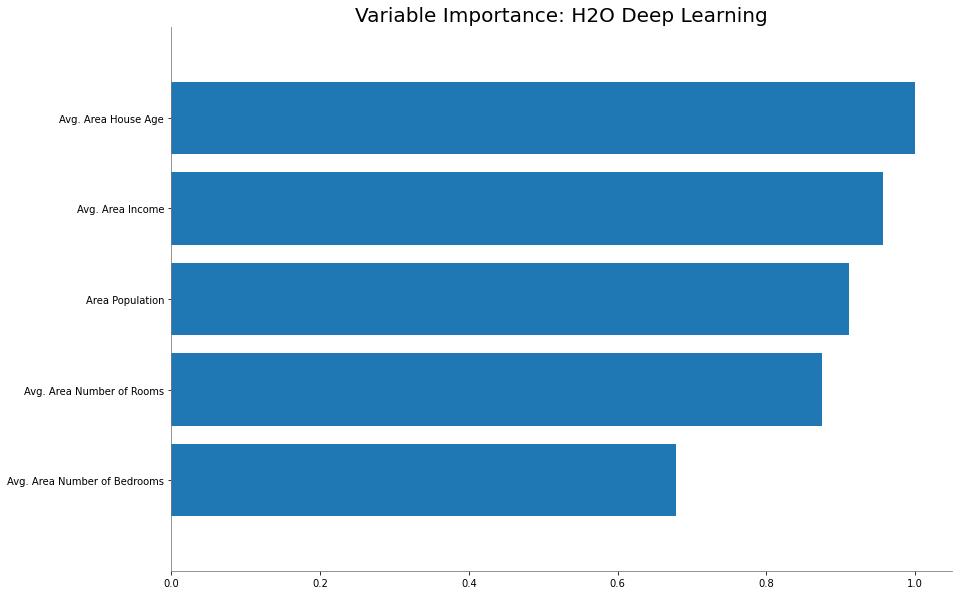

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot Variable Importance Plot to determine predictor significance

if best_model.algo in ['gbm','drf','xrt','xgboost','deeplearning']:
  best_model.varimp_plot()

In [26]:
print(best_model.rmse(train = True))

105969.05159201867


In [27]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [28]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 10770254918.410124,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 103779.83868945896}

In [29]:
predictions = best_model.predict(df_test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [30]:

y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,7.964455e+05
1,5.755583e+05
2,9.117094e+05
3,1.314187e+06
4,1.298525e+06


## **Correlation HeatMap**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


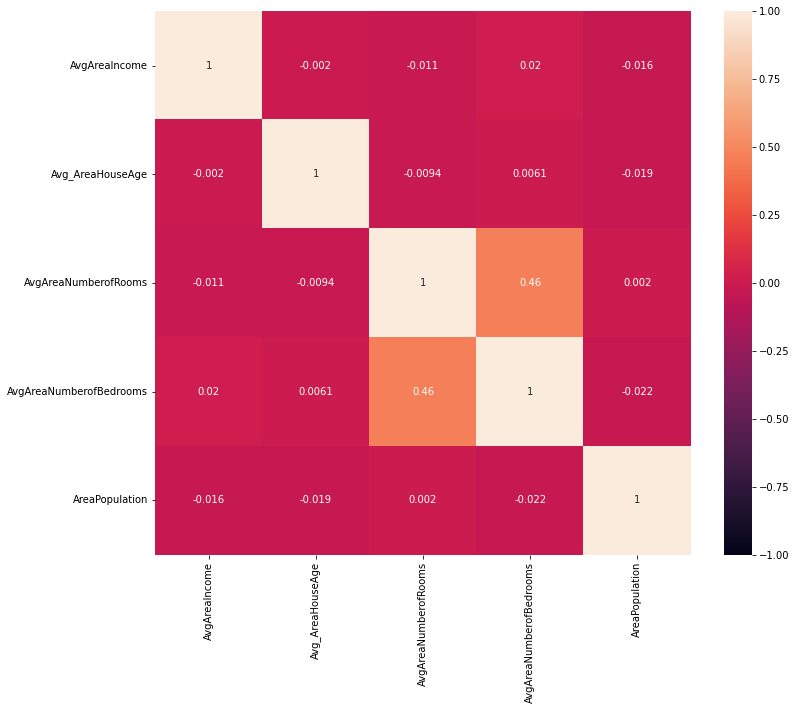

In [31]:
#Print Heatmap to determine correlation between independent variables

pathname="https://github.com/mandardeshmukh7/DataScience/raw/main/USA_Housing_copy.csv"
df_pd = pd.read_csv(pathname)

df_pd_hm = df_pd.drop('Price',1)

plt.figure(figsize = (12,10))
sns.heatmap(df_pd_hm.corr(),vmin = -1, vmax = 1,annot=True)

## **Pair Plot**

Text(0.5, 1.0, 'Pairplot')

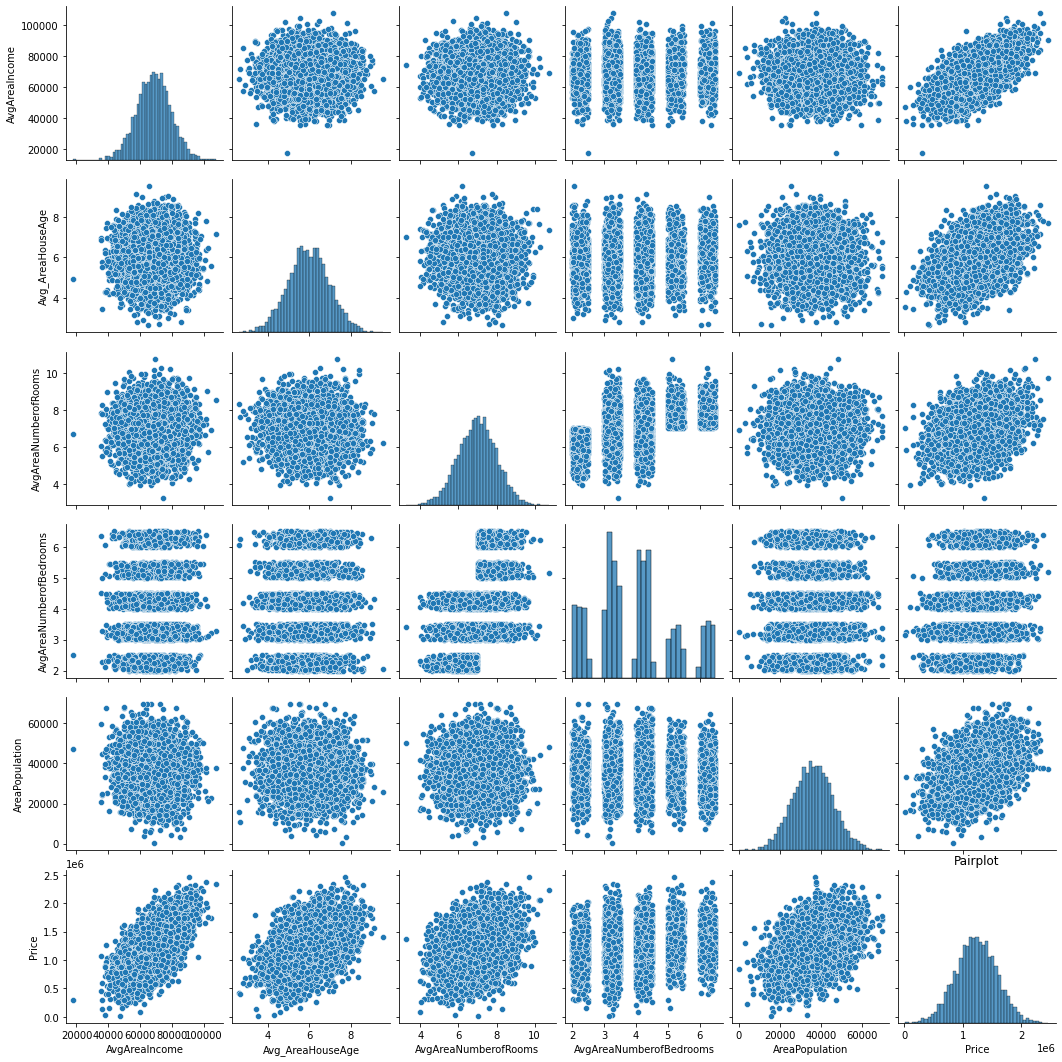

In [32]:
#Print PairPlot to determine correlation between independent variables

sns.pairplot(df_pd)
plt.title("Pairplot")

## **Residual Analysis Plot**

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

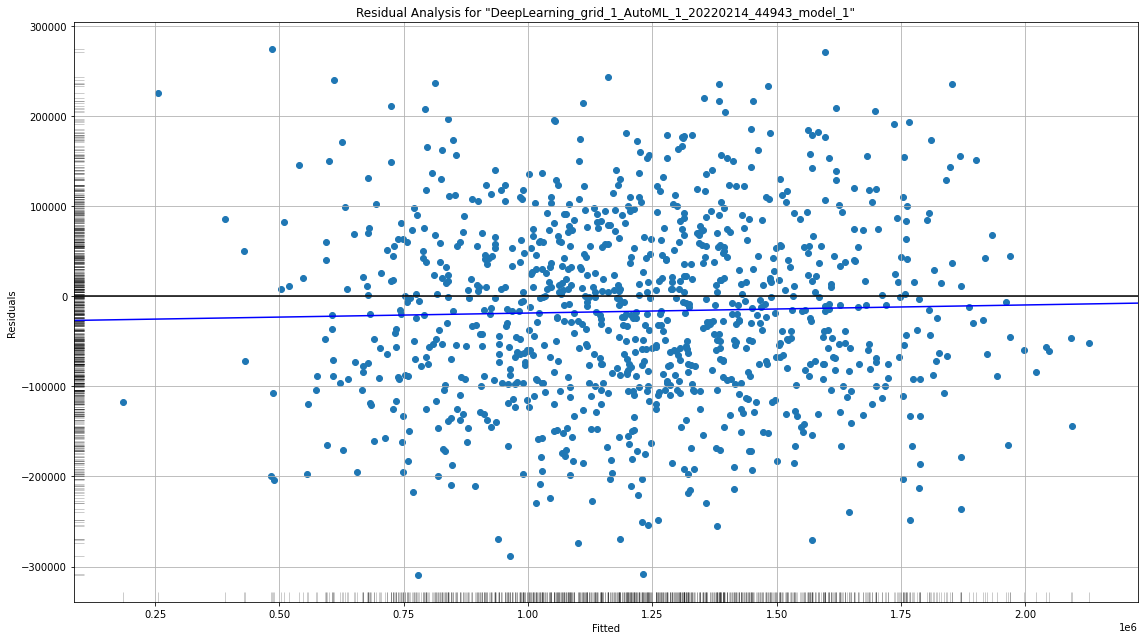

In [33]:
#Plot Residual Analysis plot to determine homodescedasticity

exa = aml.leader.explain(df_test, include_explanations = "residual_analysis")

## **Calculating P-value using OLS**

In [34]:
import statsmodels.formula.api as smf 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
#OLS Regression to get the metrics 

results = smf.ols('Price ~ AvgAreaIncome +  Avg_AreaHouseAge + AvgAreaNumberofRooms + AvgAreaNumberofBedrooms + AreaPopulation', data=df_pd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:53:49   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
AvgAreaIncome              21.5780      0.134    160.656      0.000      21.315      21.841
Avg_AreaHouseAge         1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
AvgAreaNumberofRooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
AvgAreaNumberofBedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
AreaPopulation             15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Regularization**

In [36]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

house_dl = H2OGeneralizedLinearEstimator(family = 'auto', lambda_ = 0, compute_p_values = True)

house_dl_regularization = H2OGeneralizedLinearEstimator( family = 'auto', lambda_ = 0.01, alpha = 1 )

In [37]:
dfr=df.drop("Avg. Area Number of Bedrooms")
X3 = dfr.columns
Y3='Price'

pct_rows=0.80
df1_train, df1_test = df.split_frame([pct_rows])

In [38]:
#Train the Regularization to get the metrics after regularization

house_dl_regularization.train(x = X, y= y,training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644814148780_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Lasso (lambda = 0.01 ),5,5,1,py_14_sid_a7d4




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 10155325113.160395
RMSE: 100773.63302551117
MAE: 81100.28199403253
RMSLE: 0.10586326163152392
R^2: 0.920259165836197
Mean Residual Deviance: 10155325113.160395
Null degrees of freedom: 3993
Residual degrees of freedom: 3988
Null deviance: 508652422906008.1
Residual deviance: 40560368501962.62
AIC: 103375.28960515384

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2
0,,2022-02-14 04:53:50,0.000 sec,0,508652425447238.125,127354137568.161758,,,,
1,,2022-02-14 04:53:50,0.028 sec,1,,,100773.633026,10155325113.160395,81100.281994,0.920259



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Avg. Area Income,232071.656250,1.000000,0.345196
1,Avg. Area House Age,163765.968750,0.705670,0.243595
2,Area Population,152150.765625,0.655620,0.226318
3,Avg. Area Number of Rooms,122542.632812,0.528038,0.182277
4,Avg. Area Number of Bedrooms,1757.741333,0.007574,0.002615


## **Hyperparameters**

In [39]:
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [40]:
dfh = pd.read_csv(url)
dfh1=dfh.drop(['Address','Avg. Area Number of Bedrooms'],axis=1)

In [41]:
m = dfh1['Price']

n = dfh1.drop(['Price'], axis = 1)

In [42]:
n_train, n_test, m_train, m_test = train_test_split (n, m, random_state = 101, test_size = 0.2)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_vals = {'max_depth': [200,500], 'n_estimators': [100,200]}

random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,

n_iter=10, scoring='accuracy', refit=True, n_jobs=-1)

In [44]:
random_rf.fit(n_train, m_train)

preds = random_rf.best_estimator_.predict(n_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  category=UserWarning,


In [45]:
random_rf.best_params_

{'max_depth': 200, 'n_estimators': 100}

## **Questions**

**Q1. Is the relationship significant?**

In the variable importance plot, it is visible that Income, House Age, Population, Number of rooms are significantly related with the target column as compared to Number of Bedrooms. 

Also, in the ordinary least squares regression, we can see that p-value is 0 for all the columns except for NumberOfBedrooms. This signifies that we can reject the null hypothesis and the relationships are significant.

**Q2. Is there any multicollinearity in the model?**

As from the multicollinearity matrix, it can be seen that only the NumberOfRooms and NumberOfBedrooms are highly correlated with a value of 0.46. However, all the other predictors do not have a significant value which indicates that their correlation is highly unlikely.  It can be evidently seen from the pairplot as well.

**Q3. In the multivariate models, are predictor variables independent of all other predictor variables?**

As observed from the correlation matrix, i.e. heatmap, all the predictor variables are independent of each other with values close to 0. Only,  NoOfBedrooms and NoOfRooms have a value of 0.46 which depicts that they are dependent.

**Q4.In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

Based on the ordinary least squares regression, the p-values of 0 for the predictors, Income, HouseAge, NoOfRooms, and Population depicts they are significant. On the other hand, the p-value of 0.207 for NoOfBedrooms makes it insignificant as a predictor variable.

**Q5.Does the model make sense?**

As from the leaderboard, it can be inferred that the metrics  MSE, RMSE and mean residual deviance of the DeepLearning model is better than all the other models

**Q6.Does regularization help?**

Through Regularization,  after tuning in different  values for alpha in range [0 to 0.5] and lambda in range [0 to 0.9], it was observed that the values of MSE, RMSE and mean residual deviance  did not improve, instead deteriorated the metrics. Hence, it can be inferred that Regularization did not help.

**Q7.Which independent variables are significant?**

The lower the p-value, more we can say that the predictor variable is significant. Hence, with a p-value of 0, it can be stated that the predictor variables Income, HouseAge, NoOfRooms and Population are significant.

**Q8.Which hyperparameters are important?**
I have used RandomizedSearchCV which has several important  hyperparameters such as max_depth and n_estimators.

max_depth: This defines the maximum depth of the tree. In general, deeper trees provide better accuracy or may lead to overfitting. Hence, large depth is mostly used for larger datasets.

n_estimators: This is the number of trees. The higher the number of trees, improves the performance, but on the other hand makes the code slower.

**Q9.Are any model assumptions violated?**

A- The target variable price is linearly dependent on the predictor variables Income, NoOfRooms, NoOfBedrooms, etc. As from the correlation matrix, i.e., HeatMap, it can be seen that the correlation between the predictor variables is low. Also, from the ordinary least squares regression, the Durbin-Watson score of 2.005 suggests that autocorrelation doesn’t exist. Considering all these factors, we can say that model assumptions are not violated.

# **Conclusion**

In the USA Housing Dataset, from the techniques implemented above, we can see that all the predictors have a significant impact on the housing prices except for the NoOfBedRooms. It was also observed that there is a linear relationship between all the predictor variables(except NoOfBedrooms) and the target variable, Price. The best model selected, DeepLearning has performed better than the other models from the leaderboard with better Metric scores like MSE, RMSE and MAE. Also, the autocorrelation does not exist and the correlation between the predictor variables is minimal. However, there has been no improvement in the MSE and RSME values after tuning the hyperparameters and hence a further study is needed to detect the optimal hyperparameters.

# **References**

* Dataset (https://www.kaggle.com/mirichoi0218/insurance)

* Github(https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb)

* Regularization (https://www.nbshare.io/notebook/391169912/Lasso-and-Ridge-Linear-Regression-Regularization/)

* Towards Data Science - (https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7)

* H2O offical documentation (https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html)

* OLS (https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc)







**MIT License**

Copyright (c) 2022 mandardeshmukh7

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.